# In this notebook we impute the missing values in our dataset.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('data/data_by_hour.csv')
df

,time,AppleStandHour,SleepAnalysis,ActiveEnergyBurned,AppleStandTime,BasalEnergyBurned,DistanceWalkingRunning,EnvironmentalAudioExposure,HeartRate,HeartRateVariabilitySDNN,OxygenSaturation,PhysicalEffort,RespiratoryRate,StepCount,SleepDuration
0,2022-08-04 00:00:00+02:00,NaN,NaN,NaN,NaN,NaN,0.072130,NaN,NaN,NaN,NaN,NaN,NaN,114.0,NaN
1,2022-08-04 02:00:00+02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-08-04 03:00:00+02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-08-04 04:00:00+02:00,NaN,NaN,NaN,NaN,NaN,0.010230,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN
4,2022-08-04 05:00:00+02:00,NaN,NaN,NaN,NaN,NaN,0.021410,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22719,2025-05-31 12:00:00+02:00,HKCategoryValueAppleStandHourIdle,HKCategoryValueSleepAnalysisAsleepREM,1.151,NaN,77.368,NaN,40.1504,58.0,NaN,0.99,1.0,15.0,NaN,0.755556
22720,2025-05-31 13:00:00+02:00,HKCategoryValueAppleStandHourIdle,NaN,18.354,NaN,96.214,0.115445,61.2572,65.0,62.6605,NaN,1.1,NaN,156.0,NaN
22721,2025-05-31 14:00:00+02:00,HKCategoryValueAppleStandHourIdle,NaN,21.603,1.0,110.043,0.207285,70.9537,72.0,NaN,NaN,1.4,NaN,258.0,NaN
22722,2025-05-31 15:00:00+02:00,HKCategoryValueAppleStandHourStood,NaN,5.673,NaN,24.657,NaN,71.5681,69.0,NaN,NaN,1.4,NaN,NaN,NaN


##### Set the time type to datetime

In [6]:
df['time'] = pd.to_datetime(df['time'])

## Imputation

### The NaN values represent the instances where the values where not measured by the device (Apple Watch or iPhone).

In [7]:
import pandas as pd
import numpy as np

def impute_by_hour(df, column, method='mean'):
    """
    Impute missing values in a column using the mean or mode per hour of day.

    Parameters:
    - df: pandas DataFrame with a DatetimeIndex
    - column: str, name of the column to impute
    - method: str, 'mean' or 'mode'

    Returns:
    - df: pandas DataFrame 
    """

    df = df.copy()
    df['hour_temp'] = df.time.dt.hour

    if method == 'mean':
        df[column] = df[column].astype('float')
        imputed_values = df.groupby('hour_temp')[column].transform('mean')
    elif method == 'mode':
        def mode_or_nan(x):
            m = x.mode()
            return m.iloc[0] if not m.empty else np.nan
        imputed_values = df.groupby('hour_temp')[column].transform(mode_or_nan)
    else:
        raise ValueError("Method must be 'mean' or 'mode'")

    df[column] = df[column].fillna(imputed_values)
    df = df.drop(columns='hour_temp')

    return df


In [8]:
df.isna().sum() / len(df)

time                          0.000000
AppleStandHour                0.132283
SleepAnalysis                 0.699261
ActiveEnergyBurned            0.125902
AppleStandTime                0.553380
BasalEnergyBurned             0.089465
DistanceWalkingRunning        0.315525
EnvironmentalAudioExposure    0.133295
HeartRate                     0.127046
HeartRateVariabilitySDNN      0.578199
OxygenSaturation              0.530320
PhysicalEffort                0.374802
RespiratoryRate               0.699217
StepCount                     0.315569
SleepDuration                 0.699261
dtype: float64

### Stand Hour, a category sample type that counts the number of hours in the day during which the user has stood and moved for at least one minute per hour.

### Since the hours have a great correlation with the times we stood or move, we impute the stand hour using the mode or average by hour.

In [9]:
df = impute_by_hour(df, 'AppleStandHour', method='mode')
df[['time', 'AppleStandHour']]

,time,AppleStandHour
0,2022-08-04 00:00:00+02:00,HKCategoryValueAppleStandHourIdle
1,2022-08-04 02:00:00+02:00,HKCategoryValueAppleStandHourIdle
2,2022-08-04 03:00:00+02:00,HKCategoryValueAppleStandHourIdle
3,2022-08-04 04:00:00+02:00,HKCategoryValueAppleStandHourIdle
4,2022-08-04 05:00:00+02:00,HKCategoryValueAppleStandHourIdle
...,...,...
22719,2025-05-31 12:00:00+02:00,HKCategoryValueAppleStandHourIdle
22720,2025-05-31 13:00:00+02:00,HKCategoryValueAppleStandHourIdle
22721,2025-05-31 14:00:00+02:00,HKCategoryValueAppleStandHourIdle
22722,2025-05-31 15:00:00+02:00,HKCategoryValueAppleStandHourStood


### We do the same for the following columns: SleepAnalysis, ActiveEnergyBurned, AppleStandTime, BasalEnergyBurned, DistanceWalkingRunning, EnvironmentalAudioExposure, HeartRate, HeartRateVariabilitySDNN, OxygenSaturation, PhysicalEffort, RespiratoryRate, StepCount 

In [13]:
columns_to_impute_by_hour = ['ActiveEnergyBurned', 'AppleStandTime', 'BasalEnergyBurned', 'DistanceWalkingRunning', 'EnvironmentalAudioExposure', 'HeartRate', 'HeartRateVariabilitySDNN', 'OxygenSaturation', 'PhysicalEffort', 'RespiratoryRate', 'StepCount', 'SleepDuration']

In [14]:
df = impute_by_hour(df, 'SleepAnalysis', method='mode')
df[['time', 'SleepAnalysis']]

,time,SleepAnalysis
0,2022-08-04 00:00:00+02:00,HKCategoryValueSleepAnalysisInBed
1,2022-08-04 02:00:00+02:00,HKCategoryValueSleepAnalysisInBed
2,2022-08-04 03:00:00+02:00,HKCategoryValueSleepAnalysisInBed
3,2022-08-04 04:00:00+02:00,HKCategoryValueSleepAnalysisInBed
4,2022-08-04 05:00:00+02:00,HKCategoryValueSleepAnalysisInBed
...,...,...
22719,2025-05-31 12:00:00+02:00,HKCategoryValueSleepAnalysisAsleepREM
22720,2025-05-31 13:00:00+02:00,HKCategoryValueSleepAnalysisInBed
22721,2025-05-31 14:00:00+02:00,HKCategoryValueSleepAnalysisInBed
22722,2025-05-31 15:00:00+02:00,HKCategoryValueSleepAnalysisInBed


In [15]:
for col in columns_to_impute_by_hour:
    df = impute_by_hour(df, col, method='mean')
df

,time,AppleStandHour,SleepAnalysis,ActiveEnergyBurned,AppleStandTime,BasalEnergyBurned,DistanceWalkingRunning,EnvironmentalAudioExposure,HeartRate,HeartRateVariabilitySDNN,OxygenSaturation,PhysicalEffort,RespiratoryRate,StepCount,SleepDuration
0,2022-08-04 00:00:00+02:00,HKCategoryValueAppleStandHourIdle,HKCategoryValueSleepAnalysisInBed,15.287916,7.003215,90.927179,0.072130,53.129131,76.650147,34.249465,0.961783,1.275385,16.944005,114.000000,0.780728
1,2022-08-04 02:00:00+02:00,HKCategoryValueAppleStandHourIdle,HKCategoryValueSleepAnalysisInBed,17.209694,7.345646,91.787314,0.343398,54.230679,75.890367,36.930276,0.962065,1.314262,16.577730,471.746457,0.758449
2,2022-08-04 03:00:00+02:00,HKCategoryValueAppleStandHourIdle,HKCategoryValueSleepAnalysisInBed,17.491077,7.707921,91.742877,0.340132,55.008854,77.330829,37.945356,0.961650,1.404849,17.141126,478.870482,1.256725
3,2022-08-04 04:00:00+02:00,HKCategoryValueAppleStandHourIdle,HKCategoryValueSleepAnalysisInBed,17.900412,8.258486,93.768626,0.010230,55.067301,77.201161,38.062741,0.961553,1.312667,16.549994,16.000000,0.596337
4,2022-08-04 05:00:00+02:00,HKCategoryValueAppleStandHourIdle,HKCategoryValueSleepAnalysisInBed,19.763398,9.037313,93.143029,0.021410,55.529117,77.738004,39.984807,0.961773,1.383361,16.432174,31.000000,0.527997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22719,2025-05-31 12:00:00+02:00,HKCategoryValueAppleStandHourIdle,HKCategoryValueSleepAnalysisAsleepREM,1.151000,10.233010,77.368000,0.513649,40.150400,58.000000,36.100178,0.990000,1.000000,15.000000,714.539244,0.755556
22720,2025-05-31 13:00:00+02:00,HKCategoryValueAppleStandHourIdle,HKCategoryValueSleepAnalysisInBed,18.354000,9.802513,96.214000,0.115445,61.257200,65.000000,62.660500,0.962908,1.100000,17.900285,156.000000,0.614258
22721,2025-05-31 14:00:00+02:00,HKCategoryValueAppleStandHourIdle,HKCategoryValueSleepAnalysisInBed,21.603000,1.000000,110.043000,0.207285,70.953700,72.000000,33.639615,0.962240,1.400000,17.806936,258.000000,0.680431
22722,2025-05-31 15:00:00+02:00,HKCategoryValueAppleStandHourStood,HKCategoryValueSleepAnalysisInBed,5.673000,8.972015,24.657000,0.432255,71.568100,69.000000,34.786296,0.961650,1.400000,18.071443,597.059249,0.976781


In [16]:
df.isna().sum() / len(df)

time                          0.0
AppleStandHour                0.0
SleepAnalysis                 0.0
ActiveEnergyBurned            0.0
AppleStandTime                0.0
BasalEnergyBurned             0.0
DistanceWalkingRunning        0.0
EnvironmentalAudioExposure    0.0
HeartRate                     0.0
HeartRateVariabilitySDNN      0.0
OxygenSaturation              0.0
PhysicalEffort                0.0
RespiratoryRate               0.0
StepCount                     0.0
SleepDuration                 0.0
dtype: float64

## Outliers and Noise Removal

In [17]:
from Python3Code.Chapter3.OutlierDetection import DistributionBasedOutlierDetection, DistanceBasedOutlierDetection

In [18]:
def clean_outliers(df, col, method='chauvenet', replace_with='median', **kwargs):
    df = df.copy()

    # Step 1: Detect outliers
    if method == 'chauvenet':
        detector = DistributionBasedOutlierDetection()
        df = detector.chauvenet(df, col, kwargs.get('C', 2))
        outlier_mask = df[col + '_outlier']
    elif method == 'mixture':
        detector = DistributionBasedOutlierDetection()
        df = detector.mixture_model(df, col)
        threshold = kwargs.get('threshold', np.percentile(df[col + '_mixture'].dropna(), 5))  # bottom 5%
        outlier_mask = df[col + '_mixture'] < threshold
    elif method == 'simple_distance':
        detector = DistanceBasedOutlierDetection()
        df = detector.simple_distance_based(df, [col], 'euclidean', kwargs.get('dmin', 0.5), kwargs.get('fmin', 0.5))
        outlier_mask = df['simple_dist_outlier']
    elif method == 'lof':
        detector = DistanceBasedOutlierDetection()
        df = detector.local_outlier_factor(df, [col], 'euclidean', kwargs.get('k', 10))
        lof_threshold = kwargs.get('lof_threshold', df['lof'].quantile(0.95))
        outlier_mask = df['lof'] > lof_threshold
    else:
        raise ValueError("Unsupported method")

    # Step 2: Replace outliers
    if replace_with == 'median':
        replacement = df.loc[~outlier_mask, col].median()
    elif replace_with == 'mean':
        replacement = df.loc[~outlier_mask, col].mean()
    else:
        raise ValueError("replace_with must be 'median' or 'mean'")

    df.loc[outlier_mask, col] = replacement

    return df


### We use the simple distance-based approach because it does not make assumptions of the distribution and it is simple to use.

In [19]:
for col in df.columns.to_list():
    # Skip non-numeric columns if you want
    if pd.api.types.is_numeric_dtype(df[col]):
        
        df = clean_outliers(df.copy(), col=col, method='simple_distance', dmin=0.1, fmin=0.9)
        


### Let's visualize the boxplots of the numeric columns so we can see how the data has changed.

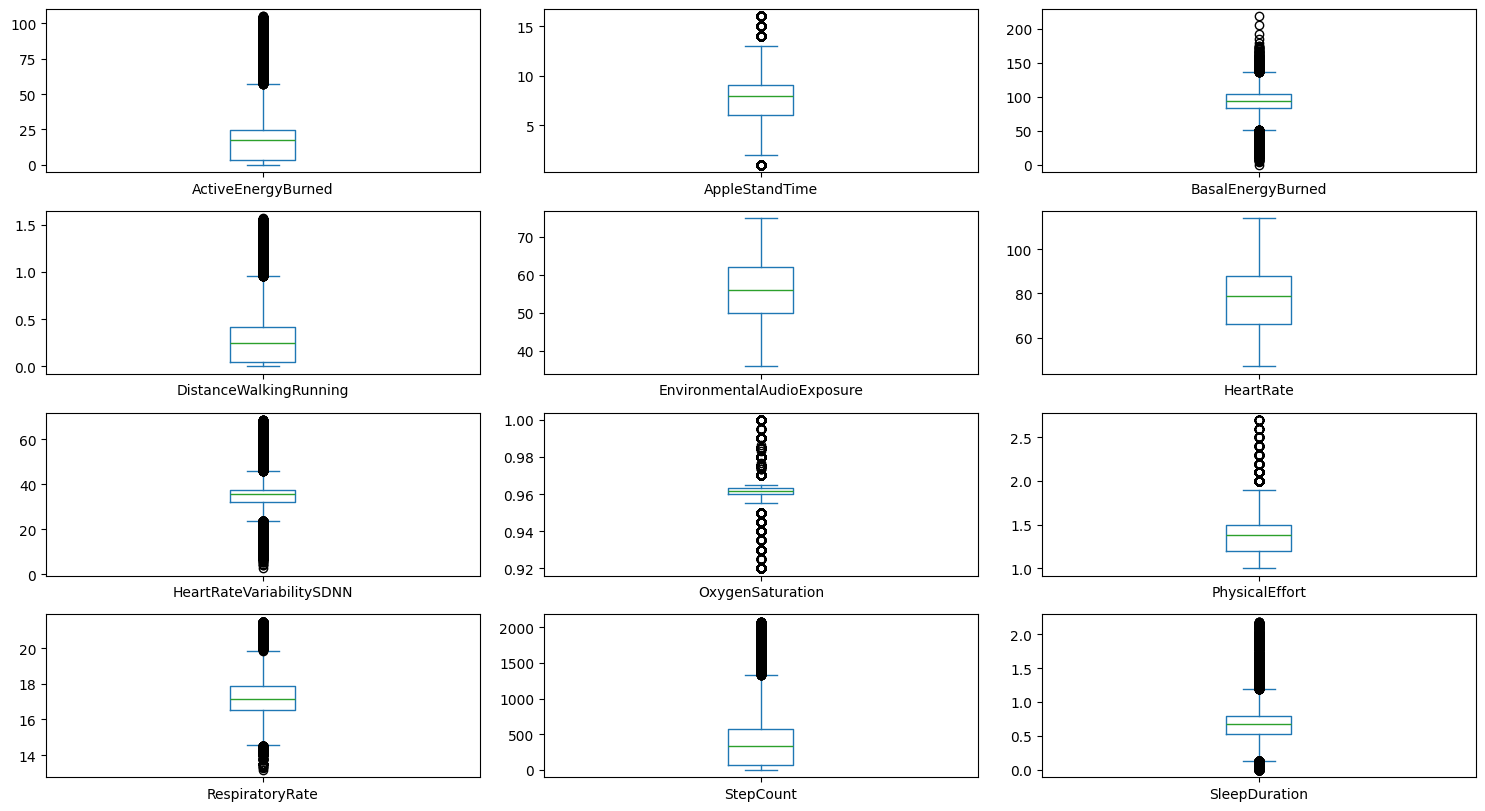

In [20]:
df.plot(kind='box', subplots=True, layout=(int(len(df.columns)**0.5)+1, -1), figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()
